# Small mobile-env test notebook

Use a predefined mobile-env environment with a random agent.

In [6]:
# predefined small scenarios
from mobile_env.scenarios.small import MComSmall

# easy access to the default configuration
MComSmall.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 0,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.central.MComCentralHandler,
 'bs': {'bw': 9000000.0, 'freq': 2500, 'tx': 30, 'height': 50},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)},
 'metrics': {'scalar_metrics': {}, 'ue_metrics': {}, 'bs_metrics': {}}}

In [9]:

import gym
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

# create a small mobile environment for a single, centralized control agent
env = gym.make("mobile-small-central-v0")
env.reset()

# select a random action: control cell connections for each UE
random_action = env.action_space.sample()
random_action

c:\Users\stbs\.conda\envs\mobile-env\lib\site-packages\gym-0.26.2-py3.8.egg\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\stbs\.conda\envs\mobile-env\lib\site-packages\gym-0.26.2-py3.8.egg\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\stbs\.conda\envs\mobile-env\lib\site-packages\gym-0.26.2-py3.8.egg\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([2, 2, 3, 3, 2], dtype=int64)

In [11]:
# apply random action to environment to run one step
obs, reward, done, info = env.step(random_action)
obs, reward, done, info

(array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.23611644,
         0.53100383, -1.        ,  0.        ,  0.        ,  0.        ,
         0.10757062,  0.09531758,  1.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.44174904,  0.25407213,  1.        ,
        -1.        ,  0.        ,  0.        ,  1.        ,  0.09822657,
         0.0771077 ,  1.        , -0.01216721,  1.        ,  0.        ,
         0.        ,  1.        ,  0.11557275,  0.158414  , -0.09906261],
       dtype=float32),
 -0.6222459656391565,
 False,
 {'number connections': 2,
  'number connected': 2,
  'mean utility': -0.6222459656391565,
  'mean datarate': 0.7895978795430647})

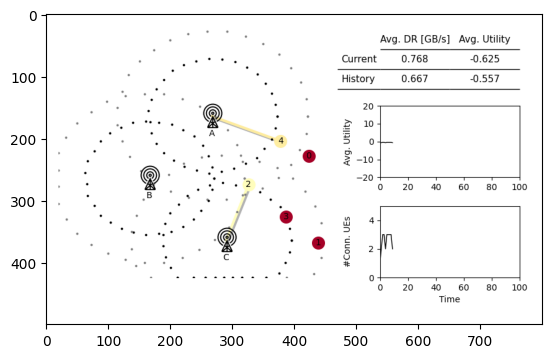

In [10]:
from IPython import display

# run for 10 steps with random actions, rendering the env
for _ in range(10):
    random_action = env.action_space.sample()
    obs, reward, done, info = env.step(random_action)

    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)